# Probability, Information Theory & Statistics

*Probability & Information Theory*, introduces the mathematical fields that enable us to quantify uncertainty as well as to make predictions despite uncertainty. These fields are essential because machine learning algorithms are both trained by imperfect data and deployed into noisy, real-world scenarios they haven’t encountered before.

You’ll develop a working understanding of 

- Variables, probability distributions, metrics for assessing distributions.
- Essential statistical tests for assessing whether data are correlated with each other or sampled from different populations -- tests which frequently come in handy for critically evaluating the inputs and outputs of machine learning algorithms.

## Part 1: Introduction to Probability

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

#### The Law of Large Numbers

The **law of large numbers** states that the more experiments we run, the closer we will tend to get to the expected probability. 

Let's run some code to examine this in practice. To start, we'll create a vector of exponentially increasing $n$umbers of coin tosses per experiment: 

In [2]:
ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]) 

In [3]:
np.random.seed(42) # for reproducibility

We will discuss the `binomial()` method in more detail in *Part 2*. For now it suffices to think of its two arguments as *number of coin flips in experiment* and *probability of heads*, while it returns the number of flips that are heads in the experiment.

In [4]:
np.random.binomial(1, 0.5)

0

In [5]:
heads_count = [np.random.binomial(n, 0.5) for n in ns]
heads_count

[2, 3, 4, 6, 13, 27, 54, 136, 258, 509, 1038, 2094]

In [6]:
proportion_heads = heads_count/ns
proportion_heads

array([1.        , 0.75      , 0.5       , 0.375     , 0.40625   ,
       0.421875  , 0.421875  , 0.53125   , 0.50390625, 0.49707031,
       0.50683594, 0.51123047])

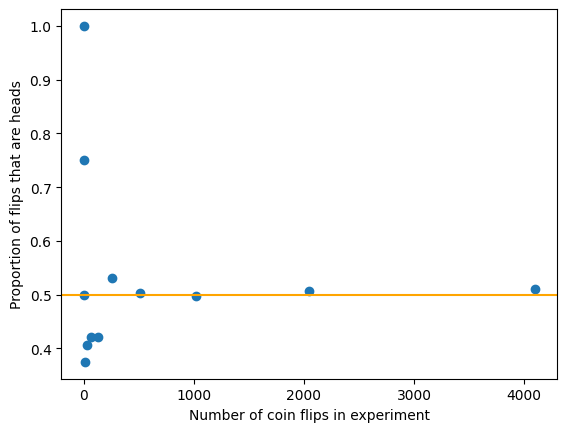

In [7]:
fig, ax = plt.subplots()
plt.xlabel('Number of coin flips in experiment')
plt.ylabel('Proportion of flips that are heads')
plt.axhline(0.5, color='orange')
_ = ax.scatter(ns, proportion_heads)

### Expected Value

In [14]:
from math import factorial
def coinflip_prob(n, k):
    n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
    return n_choose_k/2**n


In [15]:
coinflip_prob(5, 3)
0.3125
[coinflip_prob(5, h) for h in range(6)]

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

In [16]:
P = [coinflip_prob(5, x) for x in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

$$ \mathbb{E} = \sum_x xP(x) $$

In [17]:
E = sum([P[x]*x for x in range(6)])
E

2.5

**Exercises**:

1. Assuming heads = 1 and tails = 0, what’s the expected value of the toss of a fair coin? 
2. ...and of two tosses of a fair coin? 
3. You are one of a thousand people to purchase a lottery ticket. The ticket costs \\$10 and pays out \\$5000. What value should you expect from this transaction? 


### Measures of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

Expected value is in fact the long-term *mean* of some function (i.e., $\mu = \mathbb{E}$). Let's calculate how close the sample mean, $\bar{x}$, of our five-coin-flip experiments comes to the expected value, $\mathbb{E} = 2.5$.

In [ ]:
n_experiments = 1000
heads_count = np.random.binomial(5, 0.5, n_experiments)

In [18]:
len(heads_count)

1000

In [19]:
heads_count[0:20]

array([2, 2, 2, 3, 2, 3, 3, 1, 3, 1, 1, 4, 4, 3, 2, 1, 3, 2, 1, 2])

In [20]:
sum(heads_count)/len(heads_count)

np.float64(2.47)

Unsurprisingly, NumPy comes with a built-in function:

In [21]:
np.mean(heads_count)

np.float64(2.47)

In [22]:
heads_count.mean() # fun!

np.float64(2.47)

Pretty close! The law of large numbers implies that as we increase the number of experiments (e.g., to a million -- you're welcome to try it), we'll converge on $\mathbb{E}=2.5$.

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution: 

In [23]:
heads_count.sort()

In [24]:
heads_count[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
heads_count[-20:]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [26]:
len(heads_count)

1000

With an odd number of values in a distribution, we consider the single midpoint to be the median, e.g., the midpoint of the sorted array `[2, 4, 6, 9, 10]` is six.

With an even number, we take the mean of the two values that straddle the midpoint: 

In [27]:
heads_count[499]

np.int64(3)

In [28]:
heads_count[500]

np.int64(3)

...which in this case is obviously three: 

In [29]:
(3+3)/2

3.0

Built-in method:

In [30]:
np.median(heads_count)

np.float64(3.0)

#### Mode

The **mode** is the final common measure of central tendency. It is simply the value in the distribution that occurs most frequently.

As is clear in the most recently output chart, in the case of our five-coin-toss experiment, the mode is three. 

Method available in the SciPy `stats` module:

In [31]:
st.mode(heads_count)

ModeResult(mode=np.int64(3), count=np.int64(313))

In [32]:
st.mode(heads_count)[0]

np.int64(3)

With small sample sizes, the mean typically provides the most accurate measure of central tendency.

With larger sample sizes, the mean, median, and mode will tend to coincide, as long as the distribution isn't skewed: 

In [33]:
x = st.skewnorm.rvs(0, size=1000) # first argument is "skewness"; 0 has no skew

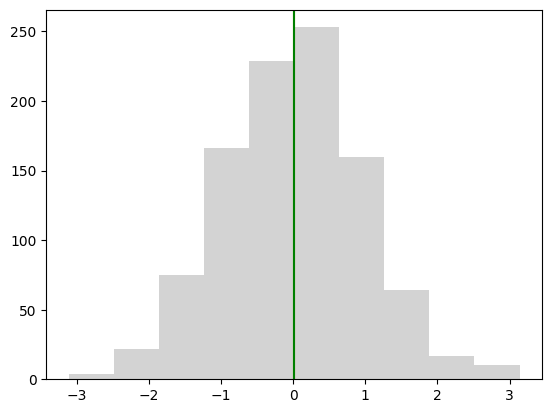

In [34]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')
# Note: Mode typically only applies to PMFs; this is a PDF

Skewed distributions, in contrast, drag the mean away from the center and toward the tail: 

In [35]:
x = st.skewnorm.rvs(10, size=1000) 

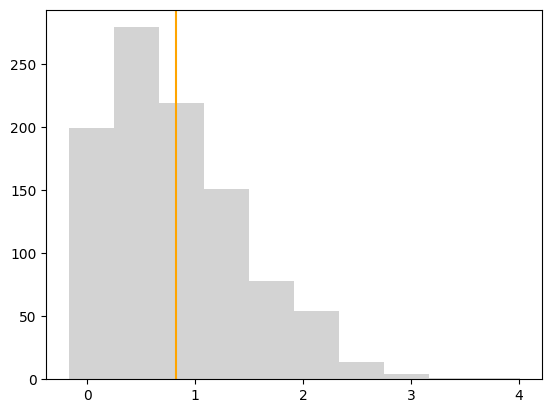

In [36]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
_ = plt.hist(x, color = 'lightgray')

The mode is least impacted by skew, but is only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

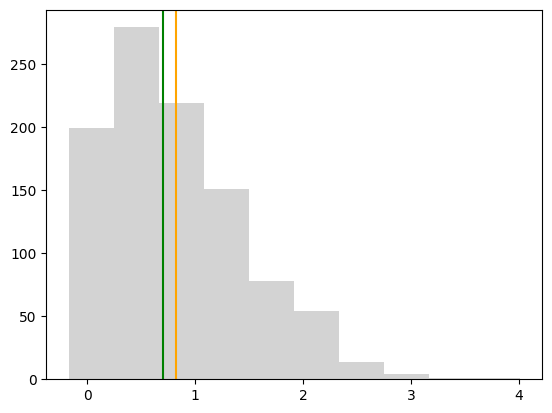

In [37]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Quantiles

The median, which divides a distribution in two at its midpoint, is the most well-known example of a quantile:

In [38]:
np.median(x)

np.float64(0.6987365121323832)

In [39]:
np.quantile(x, 0.5)

np.float64(0.6987365121323832)

Generally speaking, quantiles divide up distributions and the most common are:

* Percentiles, 
* Quartiles, and
* Deciles.

**Percentiles** divide the distribution at any point out of one hundred ("pour cent" is French for "out of a hundred"). For example, if we'd like to identify the threshold for the top 5% of a distribution, we'd cut it at the 95th percentile. Or, for the top 1%, we'd cut at the 99th percentile.

In [40]:
p = np.percentile(x, [95, 99])
p

array([2.06249928, 2.51830108])

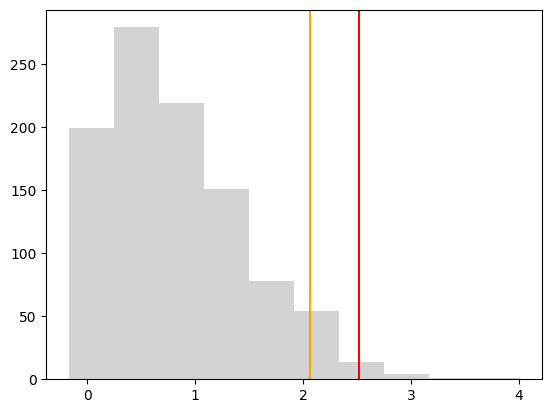

In [41]:
fig, ax = plt.subplots()
plt.axvline(x = p[0], color='orange')
plt.axvline(x = p[1], color='red')
_ = plt.hist(x, color = 'lightgray')

Note that the Numpy `quantile()` method is identical to the `percentile()` method except we pass proportions (ranging from zero to one) into the former and percentages (ranging from zero to 100) into the latter: 

In [42]:
np.quantile(x, [.95, .99])

array([2.06249928, 2.51830108])

**Quartiles**, as their name suggests, are quantiles that divide a distribution into quarters by splitting the distribution at the 25th percentile, the median (a.k.a. the 50th percentile), and the 75th percentile: 

In [43]:
q = np.percentile(x, [25, 50, 75])
q

array([0.32494046, 0.69873651, 1.19431522])

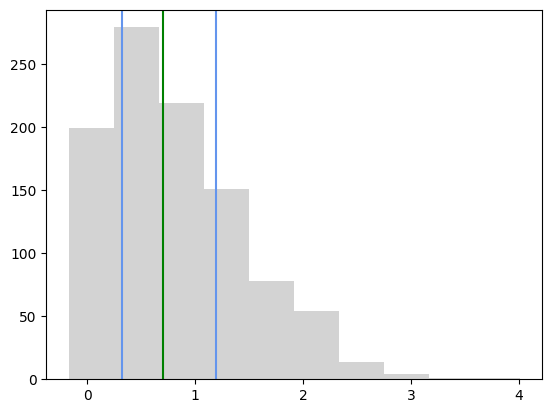

In [44]:
fig, ax = plt.subplots()
plt.axvline(x = q[0], color='cornflowerblue')
plt.axvline(x = q[1], color='green')
plt.axvline(x = q[2], color='cornflowerblue')
_ = plt.hist(x, color = 'lightgray')

Finally, **deciles** (from Latin *decimus*, meaning "tenth") divide a distribution into ten evenly-sized segments: 

In [45]:
[i for i in range(10, 100, 10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [46]:
d = np.percentile(x, range(10, 100, 10))
d

array([0.11871856, 0.24991108, 0.3992659 , 0.53290322, 0.69873651,
       0.86771624, 1.08994827, 1.30781239, 1.75782249])

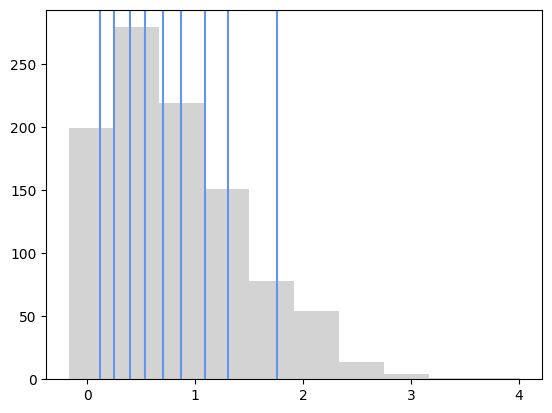

In [47]:
fig, ax = plt.subplots()
[plt.axvline(x = d_i, color='cornflowerblue') for d_i in d]
_ = plt.hist(x, color = 'lightgray')

As examples, we can refer to the bottom 10% as the bottom decile or the first decile, while the top 10% is the top decile or tenth decile.

### Measures of Dispersion

The most widely-used are: 

* Variance,
* Standard deviation, and
* Standard error. 

**Variance** (denoted with $\sigma^2$) can be written using expected-value notation, but it's easier to understand without it: 
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

As an example let's calculate the variance of the PDF `x` from earlier: 

In [48]:
xbar = np.mean(x)
xbar

np.float64(0.8219573880882259)

In [49]:
squared_differences = [(x_i - xbar)**2 for x_i in x]

In [50]:
squared_differences[0:10]

[np.float64(0.0718378634090664),
 np.float64(0.8722478661864917),
 np.float64(0.1334218838727603),
 np.float64(0.3886626067265625),
 np.float64(0.6040403927885849),
 np.float64(2.884828656909769),
 np.float64(0.3540458365909019),
 np.float64(0.02600064799461356),
 np.float64(0.4072114715667349),
 np.float64(0.7998927302046771)]

In [51]:
sigma_squared = sum(squared_differences)/len(x)
sigma_squared

np.float64(0.3981358598225055)

Of course there's a built-in NumPy method: 

In [52]:
np.var(x)

np.float64(0.39813585982250577)

#### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution: 
$$ \sigma = \sqrt{\sigma^2} $$

In [53]:
sigma = sigma_squared**(1/2)
sigma

np.float64(0.6309800787841923)

In [54]:
np.std(x)

np.float64(0.6309800787841925)

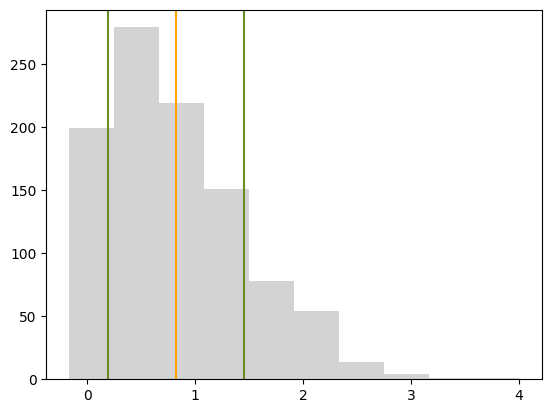

In [55]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [56]:
sigma/(len(x))**(1/2)

np.float64(0.019953342071505353)

In [57]:
st.sem(x) # defaults to 1 degree of freedom (n-1), which can be ignored with the larger data sets of ML

np.float64(0.01996332623128527)

In [58]:
st.sem(x, ddof=0) # 0 degrees of freedom (n)

np.float64(0.01995334207150536)

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

### Measures of Relatedness

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

In [59]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [60]:
x = iris.sepal_length
y = iris.petal_length

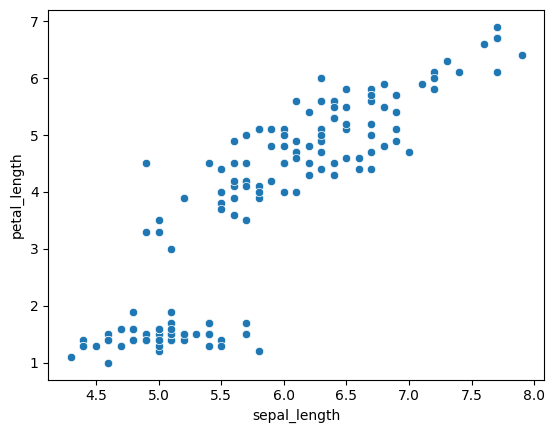

In [61]:
_ = sns.scatterplot(x=x, y=y)

The NumPy `cov()` method returns a **covariance matrix**, which is a $2 \times 2$ matrix because $x$ and $y$ together describe a two-dimensional space: 

In [66]:
np.cov(x, y, ddof=0) # again, defaults to ddof=1

array([[0.68112222, 1.26582   ],
       [1.26582   , 3.09550267]])

The diagonal elements of the covariance matrix represent the variance of $x$ and $y$, respectively: 

In [67]:
np.var(x)

np.float64(0.6811222222222223)

In [68]:
np.var(y)

np.float64(3.0955026666666665)

If $x$ and $y$ are inversely related, their covariance is negative. The less related they are, the closer their covariance is to zero: 

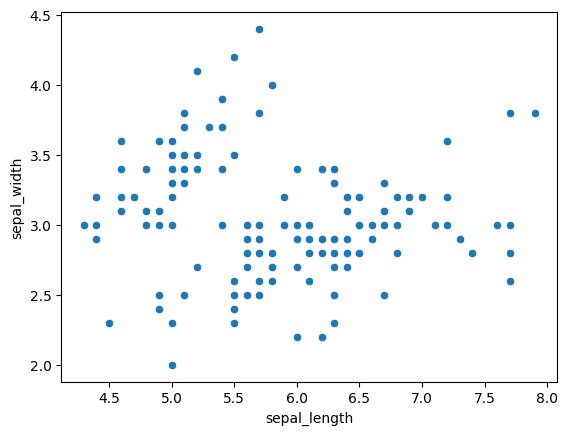

In [69]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [70]:
np.cov(iris.sepal_length, iris.sepal_width, ddof=0)

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

#### Correlation

A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. **Correlation** builds on covariance and overcomes this drawback via rescaling, thereby measuring relatedness exclusively. Correlation is much more common because of this difference. 

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by: 
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [74]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=np.float64(-0.11756978413300206), pvalue=np.float64(0.15189826071144746))

The second value output of `pearsonr` is a measure of statistical significance, which we'll detail in *Intro to Stats*. 

$\rho$ has a range of -1 to 1, with values closer to zero indicating less correlation: 

In [75]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]

np.float64(-0.11756978413300206)

The closer $\rho$ is to 1 or -1, the stronger the positive or negative correlation, respectively: 

In [76]:
st.pearsonr(iris.sepal_length, iris.petal_length)[0]

np.float64(0.8717537758865831)

N.B.: Covariance and correlation only account for linear relationships. Two variables could be non-linearly related to each other and these metrics could come out as zero.